In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, learning_curve, LearningCurveDisplay
from sklearn.metrics import mean_squared_error, f1_score
from numpy import linspace, mean
import plotly.express as px


## Carregar e visualizar os Dados - Regressão

In [2]:
# Carregar dados
df = pd.read_csv('.\datasets\colesterol.csv')

In [3]:
# Visualizar estrutura dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [4]:
# Visualizar df
df.head(10)

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33,85.1,186,199.63
1,2,A,Não,Moderado,68,105.0,184,236.98
2,3,O,Não,Alto,25,64.8,180,161.79
3,4,A,Não,Alto,43,120.2,167,336.24
4,5,AB,Não,Baixo,79,88.5,175,226.23
5,6,B,Não,Baixo,68,66.8,170,185.31
6,7,A,Sim,Baixo,60,117.3,181,289.33
7,8,O,Sim,Moderado,35,86.9,174,216.48
8,9,O,Não,Baixo,62,81.3,166,235.30
9,10,B,Sim,Alto,44,32.7,165,97.79


In [5]:
# Ajustar DF 
df.drop('Id', axis=1, inplace=True)

# Aplicar OneHotEncoding nas variáveis categoricas
df = pd.get_dummies(df, columns=['Grupo Sanguíneo','Fumante','Nível de Atividade'])

In [6]:
df.head(10)

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33,85.1,186,199.63,0,0,1,0,0,1,0,1,0
1,68,105.0,184,236.98,1,0,0,0,1,0,0,0,1
2,25,64.8,180,161.79,0,0,0,1,1,0,1,0,0
3,43,120.2,167,336.24,1,0,0,0,1,0,1,0,0
4,79,88.5,175,226.23,0,1,0,0,1,0,0,1,0
5,68,66.8,170,185.31,0,0,1,0,1,0,0,1,0
6,60,117.3,181,289.33,1,0,0,0,0,1,0,1,0
7,35,86.9,174,216.48,0,0,0,1,0,1,0,0,1
8,62,81.3,166,235.30,0,0,0,1,1,0,0,1,0
9,44,32.7,165,97.79,0,0,1,0,0,1,1,0,0


## Treinar modelo de Regressão Linear, visualizando a curva de aprendizado

In [7]:
X = df.drop(columns=['Colesterol'], axis=1)
y = df.Colesterol

In [8]:
model_reg = LinearRegression()

In [10]:
# Gerar Scores da curva de aprendizado da regressão
train_sizes_abs, train_scores, test_scores = learning_curve(model_reg, X, y, train_sizes=linspace(0.1, 0.9, 9), scoring='neg_mean_squared_error', cv=3)

In [11]:
# Train Scores
train_scores

array([[-47.58887954, -76.59138285, -76.59138285],
       [-54.96739056, -89.25681102, -89.25681102],
       [-61.46083982, -82.38125138, -82.38125138],
       [-66.03559246, -81.29023664, -81.29023664],
       [-64.83075138, -83.09325911, -83.09325911],
       [-63.76047578, -78.42545716, -79.28096061],
       [-65.70536361, -78.33851189, -76.7243984 ],
       [-66.88782412, -77.49207795, -76.58744367],
       [-70.3254912 , -79.61395088, -76.84383826]])

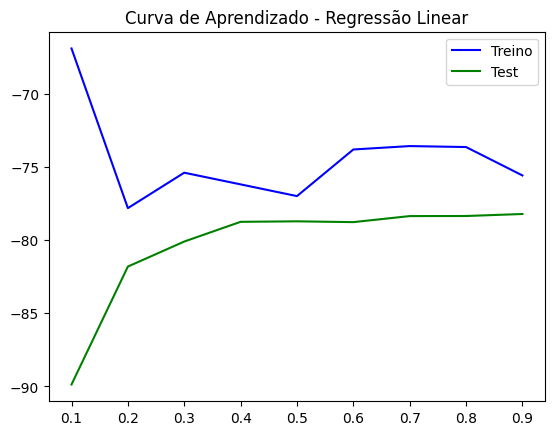

In [12]:
# Gerar plot com curva de aprendizado
plt.plot(linspace(0.1, 0.9, 9), mean(train_scores, axis=1), color='b', label='Treino')
plt.plot(linspace(0.1, 0.9, 9), mean(test_scores, axis=1), color='g', label='Test')
plt.title("Curva de Aprendizado - Regressão Linear")
plt.legend()
plt.show()

## Carregar e Preparar Dados - Classificação

In [13]:
df2 = pd.read_csv(r'.\datasets\fruit_quality.csv')

In [14]:
# Ajustar DF
df2.drop(columns=['A_id'], axis=1, inplace=True)

In [15]:
df2.Quality = (df2.Quality=='good').astype(int)

### Treinar modelo de KNN com mudança de K

In [16]:
X = df2.drop(columns=['Quality'], axis=1)
y = df2['Quality']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [19]:
# Fazer um loop para treinar o modelo com diversas quantidades de vizinhos
scores_train = []
scores_test = []

for i in range(1,20,2):
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    scores_train.append(f1_score(y_train, y_train_pred))
    scores_test.append(f1_score(y_test, y_test_pred))
    print(f'{i}: F1_Train: {f1_score(y_train, y_train_pred)} F1_Test: {f1_score(y_test, y_test_pred)}')

1: F1_Train: 1.0 F1_Test: 0.8740617180984154
3: F1_Train: 0.9452103216684341 F1_Test: 0.8964941569282137
5: F1_Train: 0.9262266148958701 F1_Test: 0.8985985160758451
7: F1_Train: 0.921935711762628 F1_Test: 0.8929460580912864
9: F1_Train: 0.9186704384724187 F1_Test: 0.8913043478260869
11: F1_Train: 0.9178130511463845 F1_Test: 0.8887029288702929
13: F1_Train: 0.9115983026874116 F1_Test: 0.8881469115191987
15: F1_Train: 0.9133969600565571 F1_Test: 0.890728476821192
17: F1_Train: 0.9099258212645708 F1_Test: 0.8883333333333333
19: F1_Train: 0.9115885875308207 F1_Test: 0.885


In [20]:
# Criar DF com os scores
df_results = pd.DataFrame({'k': range(1,20,2), 'train': scores_train, 'test': scores_test})

In [21]:
df_results

,k,train,test
0,1,1.000000,0.874062
1,3,0.945210,0.896494
2,5,0.926227,0.898599
3,7,0.921936,0.892946
4,9,0.918670,0.891304
5,11,0.917813,0.888703
6,13,0.911598,0.888147
7,15,0.913397,0.890728
8,17,0.909926,0.888333
9,19,0.911589,0.885000


In [23]:
# Mostrar plot com Scores
xaxis = x = [i for i in range(1,20,2)]
fig = px.line(df_results, x='k', y=['train','test'], title='KNN Performance - Mudando K')
fig.update_xaxes(tickvals=xaxis, ticktext=[str(i) for i in x])
fig.show()